In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_pickle('.\99 - cnpj\cnpjs.pkl')
df_emp = pd.read_pickle('.\99 - cnpj\Empresas\empresa.pkl')
df_est = pd.read_pickle('.\99 - cnpj\Estabelecimentos\estabelecimentos.pkl')
df_natur_jud = pd.read_pickle(r'.\99 - cnpj\naturezas\natureza_juridica.pkl')
df_qualifics = pd.read_pickle('.\99 - cnpj\Qualificacoes\qualificacoes.pkl')
df_cnaes = pd.read_pickle('.\99 - cnpj\Cnaes\cnaes.pkl')
df_municipio = pd.read_pickle('.\99 - cnpj\Municipios\municipio.pkl')
df_socios = pd.read_pickle('.\99 - cnpj\Socios\socios.pkl')
df_motivos = pd.read_pickle(r'.\99 - cnpj\Motivos\motivos.pkl')
df_simples = pd.read_pickle(r'.\99 - cnpj\\Simples\simples.pkl')
df_imunes_isentas = pd.read_pickle(r'.\99 - cnpj\Imunes e isentas\imunes_isentas.pkl')
df_lucro_arbitrado = pd.read_pickle(r'.\99 - cnpj\Lucro Arbitrado\lucro_arbitrado.pkl')
df_lucro_presumido = pd.read_pickle(r'.\99 - cnpj\Lucro Presumido\lucro presumido.pkl')
df_lucro_real = pd.read_pickle(r'.\99 - cnpj\Lucro Real\lucro real.pkl')

In [3]:
df = pd.merge(df,df_emp, on='cnpj_basico', how='inner')

In [4]:
hoje = datetime.today().date()
print(type(hoje))

<class 'datetime.date'>


In [5]:
df['porte'] = df['porte'].astype(int)

map_porte = {0: 'Não Informado',
             1: 'Micro Empresa',
             3: 'Empresa Pequeno Porte',
             5: 'Demais'}
df['porte'] = df['porte'].replace(map_porte)
df['porte'].unique()

array(['Empresa Pequeno Porte', 'Micro Empresa', 'Demais'], dtype=object)

In [6]:
df_qtd_estbs = df_est['cnpj_basico'].value_counts().to_frame()
df_qtd_estbs.reset_index(inplace=True)
df_qtd_estbs.set_axis(['cnpj_basico','quantidade_estabelecimentos_grupo'], axis='columns',inplace=True)
df = pd.merge(df, df_qtd_estbs, on='cnpj_basico', how='inner')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   cnpj                               61 non-null     object
 1   cnpj_dv                            61 non-null     int64 
 2   cnpj_ordem                         61 non-null     int64 
 3   cnpj_basico                        61 non-null     int64 
 4   razao_social                       61 non-null     object
 5   natureza_jur                       61 non-null     int64 
 6   quali_resp                         61 non-null     int64 
 7   capital_social                     61 non-null     object
 8   porte                              61 non-null     object
 9   ente_fed_resp                      0 non-null      object
 10  quantidade_estabelecimentos_grupo  61 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 5.7+ KB


In [8]:
df = pd.merge(df, df_est, on=['cnpj_basico','cnpj_ordem','cnpj_dv'], how='inner')
df.head(1)

,cnpj,cnpj_dv,cnpj_ordem,cnpj_basico,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,...,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial
0,28289898000189,89,1,28289898,SWS MONTAGEM E MANUTENCAO INDUSTRIAL LTDA,2062,49,"1500000,00",Empresa Pequeno Porte,NaN,...,3849,71.0,96278133,71.0,96900414.0,NaN,NaN,GERENCIA.ADM@SWSMONTAGEM.COM.BR,NaN,NaN


In [9]:
df['data_inicio_atv'] = pd.to_datetime(df['data_inicio_atv'], format='%Y%m%d')
df['idade_empresa'] = df['data_inicio_atv'].apply(lambda x: (hoje - x.date()).days // 365)
df.drop(['data_inicio_atv'], axis='columns',inplace=True)

In [10]:
df['id_matriz_filial'] = df['id_matriz_filial'].astype(int)

map_matriz_filial = {1: 'Matriz',
             2: 'Filial'}
df['id_matriz_filial'] = df['id_matriz_filial'].replace(map_matriz_filial)
df['id_matriz_filial'].unique()

array(['Matriz', 'Filial'], dtype=object)

In [11]:
df['sit_cadastral'] = df['sit_cadastral'].astype(int)

map_sit_cad = {1: 'Nula',
               2: 'Ativa',
               3: 'Suspensa',
               4: 'Inapta',
               8: 'Baixada'}
df['sit_cadastral'] = df['sit_cadastral'].replace(map_sit_cad)
df['sit_cadastral'].unique()

array(['Ativa', 'Inapta'], dtype=object)

In [12]:
df_natur_jud.set_axis(['natureza_jur','natureza_juridica'], axis='columns', inplace=True)
df = pd.merge(df, df_natur_jud, on='natureza_jur', how='inner')

In [13]:
df['natureza_jur'] = df['natureza_juridica']
df.drop(['natureza_juridica'], axis='columns', inplace=True)

In [14]:
df.head(1)

,cnpj,cnpj_dv,cnpj_ordem,cnpj_basico,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,...,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa
0,28289898000189,89,1,28289898,SWS MONTAGEM E MANUTENCAO INDUSTRIAL LTDA,Sociedade Empresária Limitada,49,"1500000,00",Empresa Pequeno Porte,NaN,...,71.0,96278133,71.0,96900414.0,NaN,NaN,GERENCIA.ADM@SWSMONTAGEM.COM.BR,NaN,NaN,5


In [15]:
df_qualifics.set_axis(['quali_resp','des_qualificaccao'], axis='columns',inplace=True)
df = pd.merge(df, df_qualifics, on=['quali_resp'], how='inner')
df.shape

(61, 39)

In [16]:
df['quali_resp'] = df['des_qualificaccao']
df.drop(['des_qualificaccao'], axis='columns', inplace=True)


In [17]:
df_cnaes.head(1)

,cod_cnae,des_cnae
0,111301,Cultivo de arroz


In [18]:
df_cnaes.set_axis(['cnae_fiscal_principal','des_cnae'], axis='columns', inplace=True)
df = pd.merge(df, df_cnaes, on=['cnae_fiscal_principal'], how='inner')
df.shape

(61, 39)

In [19]:
df['cnae_fiscal_principal'] = df['des_cnae']
df.drop(['des_cnae'], axis='columns', inplace=True)

In [20]:
df_municipio.set_axis(['municipio','des_municipio'], axis='columns', inplace=True)
df_municipio

,municipio,des_municipio
0,1,GUAJARA-MIRIM
1,2,ALTO ALEGRE DOS PARECIS
2,3,PORTO VELHO
3,4,BURITIS
4,5,JI-PARANA
...,...,...
5566,9989,SERRA ALTA
5567,9991,TUNAPOLIS
5568,9993,GUARINOS
5569,9995,RIO QUENTE


In [21]:
df = pd.merge(df, df_municipio, on='municipio', how='inner')
df.shape

(61, 39)

In [22]:
df['municipio'] = df['des_municipio']
df.drop(['des_municipio'], axis='columns',inplace=True)

In [23]:
df_socios.head(1)

,cnpj_basico,id_socio,nome_razao_socio,cpf_cnpj_socio,qualifica_socio,data_entrada_sociedade,pais,representante_legal,nome_representante,qualifica_representante,faixa_etaria
0,3049514,2,CLEITON NUNES DA HORA,***333177**,49,20080404,NaN,***000000**,NaN,0,4


In [24]:
df_qtd_socios = df_socios['cnpj_basico'].value_counts().to_frame()
df_qtd_socios.reset_index(inplace=True)
df_qtd_socios.set_axis(['cnpj_basico','quantidade_socios_grupo'], axis='columns',inplace=True)
df = pd.merge(df, df_qtd_socios, on='cnpj_basico', how='left')

In [25]:
df.shape

(61, 39)

In [26]:
from numpy import double

df['capital_social'] = df['capital_social'].apply(lambda x: x.replace(',','.'))
df['capital_social'] = df['capital_social'].astype(double)

In [27]:
df_socios['id_socio'] = df_socios['id_socio'].astype(int)

map_id_estrangeiro = {1: 'Pessoa Jurídica',
               2: 'Pessoa Física',
               3: 'Estrangeiro'}
df_socios['id_socio'] = df_socios['id_socio'].replace(map_id_estrangeiro)
df_socios['id_socio'].unique()

array(['Pessoa Física', 'Pessoa Jurídica'], dtype=object)

In [28]:
df_socios['faixa_etaria'] = df_socios['faixa_etaria'].astype(int)

map_faixa_etaria_de = {1: 0,
                       2: 13,
                       3: 21,
                       4: 31,
                       5: 41,
                       6: 51,
                       7: 61,
                       8: 71,
                       9: 81}
df_socios['faixa_etaria_de'] = df_socios['faixa_etaria'].replace(map_faixa_etaria_de)
df_socios['faixa_etaria_de'].unique()

array([31, 61, 51,  0, 71, 41, 81, 21])

In [29]:
map_faixa_etaria_ate = {1: 12,
                       2: 20,
                       3: 30,
                       4: 40,
                       5: 50,
                       6: 60,
                       7: 70,
                       8: 80,
                       9: 90}
df_socios['faixa_etaria_ate'] = df_socios['faixa_etaria'].replace(map_faixa_etaria_ate)
df_socios['faixa_etaria_ate'].unique()

array([40, 70, 60,  0, 80, 50, 90, 30])

In [30]:
df_socios['media_faixa']  = (df_socios['faixa_etaria_ate']+df_socios['faixa_etaria_de'])/2

In [31]:
df_socios_pf = df_socios.query("id_socio=='Pessoa Física'")
df_socios_med_idade = df_socios_pf.groupby('cnpj_basico')['media_faixa'].mean().to_frame().reset_index()
df_socios_med_idade.set_axis(['cnpj_basico','media_idade_socios_pf'], axis='columns',inplace=True)
df = pd.merge(df, df_socios_med_idade, on='cnpj_basico', how='left')

<AxesSubplot:>

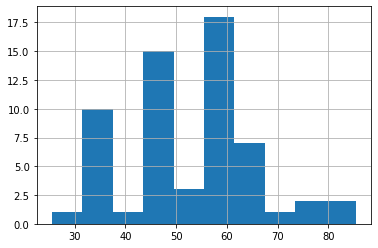

In [32]:
df.media_idade_socios_pf.hist()

In [33]:
df_simples.head(1)

,cnpj_basico,opcao_simples,data_opcao_simples,data_exclusao_simples,opcao_mei,data_opcao_mei,data_exclusao_mei
405054,2172808,S,20070701,0,N,0,0


In [34]:
df_xk_simples = df_simples.groupby('cnpj_basico')['cnpj_basico'].count().to_frame()
df_xk_simples.set_axis(['qtd_linhas'], axis='columns',inplace=True)
df_xk_simples.reset_index(inplace=True)
df_xk_simples.query('qtd_linhas > 1')

,cnpj_basico,qtd_linhas


In [35]:
df_simples.shape

(24, 7)

In [36]:
df_simples = df_simples.query("opcao_simples=='S' and data_exclusao_simples==0")
df = pd.merge(df, df_simples[['cnpj_basico','opcao_simples']], on='cnpj_basico', how='left')
df.shape

(61, 41)

In [37]:
df_motivos.head(1)
df_motivos.set_axis(['motivo_sit_cadastral','des_sit_cadastral'], axis='columns',inplace=True)


In [38]:
df = pd.merge(df, df_motivos, on='motivo_sit_cadastral', how='left')
df.shape

(61, 42)

In [39]:
df['motivo_sit_cadastral'] = df['des_sit_cadastral']
df.drop('des_sit_cadastral', axis='columns',inplace=True)

In [40]:
# df_empresas_qtd_participacoes = df_outliers.groupby(['TAXNUM','OPPORT_NUM']).count()[['STATUS']]
# df_empresas_qtd_participacoes.reset_index(inplace=True)
# df_empresas_qtd_participacoes = df_empresas_qtd_participacoes.groupby(['TAXNUM']).count()[['OPPORT_NUM']]
# df_empresas_qtd_participacoes.reset_index(inplace=True)

In [41]:
df.to_pickle('Empresas.pkl')
df.to_excel('Empresas.xlsx')